In [367]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [368]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# Importando dados

In [377]:
df = pd.read_csv('desafio_de_credito.csv', index_col = 'id')
df.columns

Index(['default', 'risk', 'var_a', 'var_b', 'var_c', 'var_d', 'var_e', 'var_f',
       'borrowed', 'months', 'limit', 'reason', 'income', 'sign', 'sex',
       'social_network', 'state', 'zipcode', 'channel', 'job_name',
       'real_state', 'ok_since', 'n_bankruptcies', 'n_defaulted_loans',
       'n_accounts', 'n_issues', 'Unnamed: 27'],
      dtype='object')

# Limpando a Base de dados

In [378]:
df = df.loc[df.default.notna(), :]
df.drop('Unnamed: 27', axis=1, inplace=True)
df.head()

,default,risk,var_a,var_b,var_c,var_d,var_e,var_f,borrowed,months,limit,reason,income,sign,sex,social_network,state,zipcode,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
id,,,,,,,,,,,,,,,,,,,,,,,,,,
77a10088-92d9-62a3-defb-4b63b6f28805,False,0.30,340.0,9.387215e+11,0.777031,4DLlLW62jReXaqbPaHp1vQ==,pAzpxkhjPsjWldgSX21+zg==,1.030404447210E+11,1.1017370E+04,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIeWE6/Di5FBOmihprdjI0zb3rnJkUI6G1sJC0+Ao35Wk,1.000077200000E+05,libr,m,False,1DpYl6dtzY0qE33poow3iw==,8qgxecfbVQrBbH6hc6MigQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhj/n6nOM7m650h/qGD8jnCaUM6L8DJEpoVrAB7dkKtnM=,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,8.0,NaN
26a68732-a660-8cf9-340d-34c88ecdcbf0,False,0.25,470.0,1.035186e+16,0.082595,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,1.024772020850E+11,1.8018630E+04,36.0,34819.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIRHm3W3kwuOarUQAvOHl6Nt6elSlunBuo17xmSg+nTdX,6.403234000000E+04,gemi,m,True,xsd3ZdsI3356I3xMxZeiqQ==,YA0xaBEZG4n6CnDMX82V+w==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiEdi2iK43GNI0SFxSb0K0fI7X5Xjd+HtFXyesVe8T8hrSTjuniGmjjDnEUyiUmcE5U=,n+xK9CfX0bCn77lClTWviw==,1.6E+01,0.0,0.0,10.0,9.0
fd228aa8-5a67-6561-4382-21c35360c01d,False,0.17,360.0,1.029325e+11,0.980142,4DLlLW62jReXaqbPaHp1vQ==,pAzpxkhjPsjWldgSX21+zg==,1.091629202060E+16,1.4016940E+04,36.0,34558.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiFN9dP0P0igCWpZcO68Xmv3,6.503538000000E+04,cance,m,False,fR2lwAMjCb/fNXjsApiOTw==,rvdltYNojzCjA1gRsbX9fA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIYDHJShGajoxdgvRzZGlQSU=,n+xK9CfX0bCn77lClTWviw==,1.9E+01,0.0,0.0,20.0,20.0
083ca221-7f4e-21c7-204d-2962c3ca9c14,False,0.21,280.0,1.028746e+11,0.561958,DGCQep2AE5QRkNCshIAlFQ==,osCzpM4hJrxugqWWuZmMWw==,1.149139526270E+16,7.1631400E+03,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIXuusuYraWV4rGB3v/7WqHKeKq5W600DOWmwjMTqsrAW,3.103994000000E+04,scor,m,False,82aTqSzrTImY+SbAOBQzGQ==,ap0+SDtWtPxkoUtdv9Jixw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIZeEV5tr8BIPorTWgBs+thI=,N5/CE7lSkAfB04hVFFwllw==,NaN,1.0,0.0,4.0,4.0
a390d111-8c65-6e1f-9566-91d815e9a4a1,True,0.39,150.0,9.784525e+11,0.152126,DGCQep2AE5QRkNCshIAlFQ==,7h+tk4z7O9brtBSe1rNjxA==,1.143503427360E+11,9.0278200E+03,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE782TEFFn7JyTsARb1kmIk,1.200110200000E+05,NaN,m,NaN,BB/zpwTH+8GCIVHlhzOU1Q==,iY2cULhh/NFBaiOCRferZQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIZo7b0j9j1CqIQBEnpwv96A=,n+xK9CfX0bCn77lClTWviw==,1.6E+01,0.0,0.0,14.0,NaN


In [379]:
def change_notation(s):
    if isinstance(s, float):
        return s
    s = s.replace('E+',' --- ')
    lst = s.split(' --- ')
    if len(lst) == 2:
        return float(lst[0])*int(lst[1])
    else:
        return np.nan

lst_to_change = ['var_f', 'borrowed', 'income', 'ok_since']
for feature in lst_to_change:
    df[feature] = df[feature].apply(lambda s: change_notation(s))
df[['var_f', 'borrowed', 'income', 'ok_since']].head()

,var_f,borrowed,income,ok_since
id,,,,
77a10088-92d9-62a3-defb-4b63b6f28805,11.334449,4.406948,5.000386,NaN
26a68732-a660-8cf9-340d-34c88ecdcbf0,11.272492,7.207452,25.612936,1.6
fd228aa8-5a67-6561-4382-21c35360c01d,17.466067,5.606776,26.014152,1.9
083ca221-7f4e-21c7-204d-2962c3ca9c14,18.386232,21.489420,12.415976,NaN
a390d111-8c65-6e1f-9566-91d815e9a4a1,12.578538,27.083460,6.000551,1.6


In [380]:
df_res_1 = pd.concat([df.dtypes,df.isna().sum()], axis=1)
df_res_1.columns = ['Dtype', 'NaNs']
df_res_1 = df_res_1[df_res_1['NaNs'] !=0 ]
df_res_1

,Dtype,NaNs
var_f,float64,2
borrowed,float64,2
limit,float64,18778
reason,object,6
income,float64,2
sign,object,18937
sex,object,2997
social_network,object,5971
job_name,object,3791
ok_since,float64,35091


In [381]:
cols_miss_obj = ['reason', 'sex', 'sign', 'social_network']
for col in cols_miss_obj:
    df.loc[:,col] = df.loc[:,col].fillna(method = 'bfill')
    
df['job_name'] = df['job_name'].fillna('nao identificado')

cols_miss_num = ['var_f', 'borrowed', 'limit', 'income', 'ok_since', 'n_bankruptcies',
                 'n_defaulted_loans', 'n_issues']

for col in cols_miss_num:
    df.loc[:,col] = df.loc[:,col].apply(lambda s: float(s) if isinstance(s, float) else np.nan).fillna(df.loc[:,col].median())

In [382]:
df_res_2 = pd.concat([df.dtypes,df.isna().sum()], axis=1)
df_res_2.columns = ['Dtype', 'NaNs']
df_res_2.loc[list(df_res_1.index),:]

,Dtype,NaNs
var_f,float64,0
borrowed,float64,0
limit,float64,0
reason,object,0
income,float64,0
sign,object,1
sex,object,0
social_network,object,0
job_name,object,0
ok_since,float64,0


In [383]:
df_res_3 = pd.concat([df.dtypes,df.nunique()], axis=1)
df_res_3.columns = ['Dtype', 'n_classes']
df_res_3

,Dtype,n_classes
default,object,2
risk,float64,81
var_a,float64,87
var_b,float64,59966
var_c,float64,59966
var_d,object,9
var_e,object,37
var_f,float64,59965
borrowed,float64,50468
months,float64,3


# Seleção de variáveis
Variáveis categoricas com numero muito grande de classes tornariam o modelo inviável, selecionamos então apenas as variáveis categoricas com n_classes =< 10

In [384]:
df.drop(['var_e', 'reason', 'sign', 'state', 'zipcode', 'job_name'], axis=1, inplace=True)

# Quantidade de individos com e sem dívida ativa

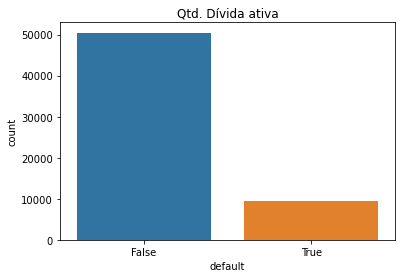

In [385]:
sns.countplot(df.default)
plt.title('Qtd. Dívida ativa')
plt.show()

# Analisando Exploratória de variáveis categóricas

                      var_d    False    True  % of default
0  1Rk8w4Ucd5yR3KcqZzLdow==  12161.0  2692.0  0.181243    
2  4DLlLW62jReXaqbPaHp1vQ==  9987.0   608.0   0.057386    
4  8k8UDR4Yx0qasAjkGrUZLw==  6521.0   1974.0  0.232372    
5  DGCQep2AE5QRkNCshIAlFQ==  18089.0  2394.0  0.116877    
6  e4NYDor1NOw6XKGE60AWFw==  2557.0   1105.0  0.301748    
7  fyrlulOiZ+5hoFqLa6UbDQ==  205.0    136.0   0.398827    
8  smzX0nxh5QlePvtVf6EAeg==  934.0    601.0   0.391531    


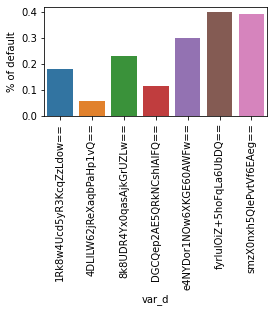

   months    False    True  % of default
0  36.0    42249.0  6035.0  0.124990    
1  60.0    8205.0   3475.0  0.297517    


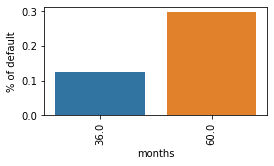

  sex    False    True  % of default
0  f   15841.0  3592.0  0.184840    
1  m   34614.0  5918.0  0.146008    


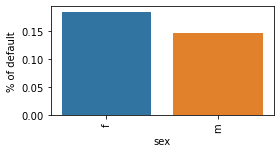

  social_network    False    True  % of default
0  False          33299.0  4421.0  0.117206    
1  True           17155.0  5089.0  0.228781    


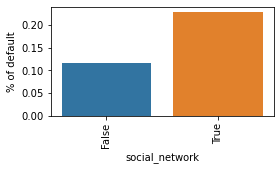

                    channel    False    True  % of default
1  NCqL3QBx0pscDnx3ixKwXg==  50454.0  9510.0  0.158595    


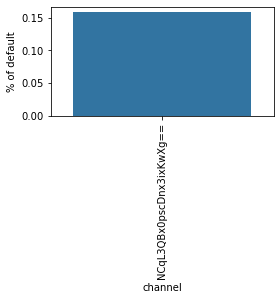

                 real_state    False    True  % of default
0  +qWF9pJpVGtTFn4vFjb/cg==  11.0     1.0     0.083333    
1  N5/CE7lSkAfB04hVFFwllw==  25321.0  4372.0  0.147240    
2  UX7AdFYgQh+VrVC5eIaU9w==  40.0     13.0    0.245283    
5  n+xK9CfX0bCn77lClTWviw==  20961.0  4348.0  0.171797    
6  nSpvDsIsslUaX6GE6m6eQA==  4121.0   776.0   0.158464    


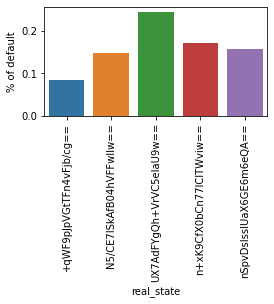

In [386]:
def gera_barra(df, feature):
    df_grouped = df.groupby([feature, 'default']).risk.count()
    df_pivot = pd.pivot_table(values = 'risk', index = feature, columns = ['default'], data = df_grouped.reset_index())
    df_pivot = df_pivot.reset_index()
    df_pivot.columns = list(df_pivot.columns.astype('str'))
    df_pivot['% of default'] = df_pivot.loc[:,'True']/df_pivot.iloc[:,1:].sum(axis=1)
    df_pivot.dropna(inplace=True)
    print(df_pivot)
    #df_pivot.plot(x = feature, y = ['False', 'True'], kind = 'bar')
    #plt.title('default')
    #plt.show()
    plt.figure(figsize = (4,2))
    sns.barplot(x = df_pivot[feature], y = df_pivot['% of default'] )
    #df_pivot.plot(x = feature, y = ['% of default'], kind = 'bar')
    plt.xticks(rotation=90)
    plt.show()

categorical_features = ['var_d', 'months',  'sex', 'social_network', 'channel', 'real_state']

for feature in categorical_features:
    gera_barra(df, feature)


# Analise Exploratória de variáveis numéricas

risk
0.3169821240799159
0.2898039876327889


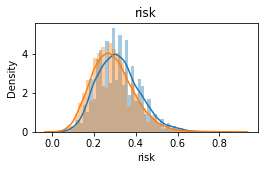

var_a
358.17665615141954
344.2220944981766


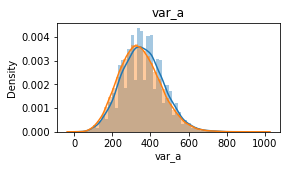

var_b
3384803056169657.5
3271372501787672.0


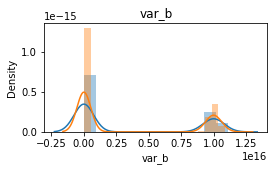

var_f
62.874356252285686
62.82700413181196


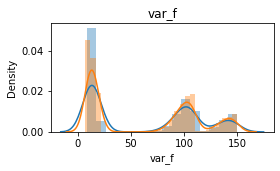

var_c
0.4977244678502958
0.4990871820662091


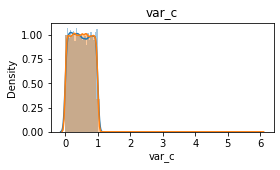

borrowed
10.907722897581493
11.214433060131599


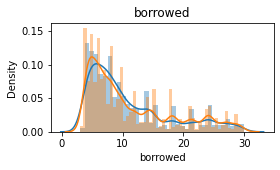

limit
30583.129442691905
31494.078563500872


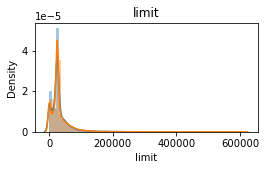

income
19.884382346004205
19.921073016131285


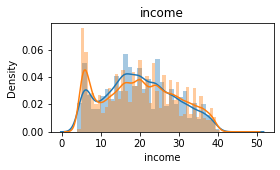

ok_since
3.2976025236593065
3.3081714761376255


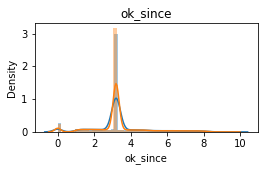

n_bankruptcies
0.08643533123028391
0.07781036943079118


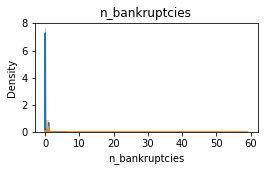

n_defaulted_loans
0.004942166140904311
0.004617884889804979


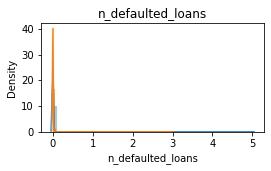

n_accounts
10.778233438485804
10.594934200095132


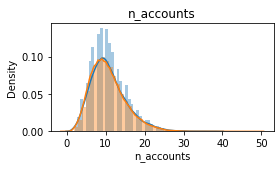

n_issues
10.913144058885385
10.708577770730933


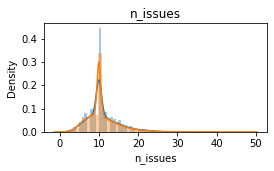

In [350]:
def gera_hist(df, feature):
    print(df.loc[df.default == True, feature].mean())
    print(df.loc[df.default == False, feature].mean())
    
    plt.figure(figsize = (4,2))
    sns.distplot(df.loc[df.default == True, feature])
    sns.distplot(df.loc[df.default == False, feature])
    plt.title(feature)
    
    plt.show()
numerical_features = ['risk', 'var_a', 'var_b','var_f', 'var_c', 'borrowed', 'limit',
                        'income', 'ok_since', 'n_bankruptcies', 'n_defaulted_loans',
                        'n_accounts', 'n_issues']

for feature in numerical_features:
    print(feature)
    gera_hist(df, feature)

# Codificação de variáveis categoricas

In [14]:
from sklearn.preprocessing import LabelEncoder

y = df.default
X_temp = df.drop('default', axis=1)

le = LabelEncoder()

categorical_features = ['var_d', 'months',  'sex', 'social_network', 'channel','real_state']

for col in categorical_features:
    le.fit(X_temp[col])
    X_temp[col] = le.transform(X_temp[col])
X_temp


,risk,var_a,var_b,var_c,var_d,var_f,borrowed,months,limit,income,sex,social_network,channel,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
id,,,,,,,,,,,,,,,,,,,
77a10088-92d9-62a3-defb-4b63b6f28805,0.30,340.0,9.387215e+11,0.777031,2,11.334449,4.406948,0,25336.5,5.000386,2,0,1,1,3.2,0.0,0.0,8.0,10.0
26a68732-a660-8cf9-340d-34c88ecdcbf0,0.25,470.0,1.035186e+16,0.082595,5,11.272492,7.207452,0,34819.0,25.612936,2,1,1,5,1.6,0.0,0.0,10.0,9.0
fd228aa8-5a67-6561-4382-21c35360c01d,0.17,360.0,1.029325e+11,0.980142,2,17.466067,5.606776,0,34558.0,26.014152,2,0,1,5,1.9,0.0,0.0,20.0,20.0
083ca221-7f4e-21c7-204d-2962c3ca9c14,0.21,280.0,1.028746e+11,0.561958,5,18.386232,21.489420,0,0.0,12.415976,2,0,1,1,3.2,1.0,0.0,4.0,4.0
a390d111-8c65-6e1f-9566-91d815e9a4a1,0.39,150.0,9.784525e+11,0.152126,5,12.578538,27.083460,0,25336.5,6.000551,2,2,1,5,1.6,0.0,0.0,14.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f9eb9e71-e8ca-bd7b-f7ad-2b2f2048541c,0.33,440.0,9.908720e+11,0.316950,5,17.945112,21.692220,0,25336.5,22.804856,2,1,1,1,3.2,0.0,0.0,8.0,10.0
687f396b-64bb-33f2-310c-a2548248d7b0,0.20,230.0,9.647300e+11,0.596363,5,16.819999,29.292030,0,15478.0,30.413108,2,0,1,1,2.9,0.0,0.0,13.0,13.0
2e359df0-bc13-74c8-f6f9-a40d2b4d0395,0.53,320.0,9.322104e+10,0.260647,6,17.046043,14.008912,1,18658.0,5.001423,1,0,1,1,3.2,0.0,0.0,7.0,7.0


In [15]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit(X_temp[categorical_features])
X_ohe= ohe.transform(X_temp[categorical_features])
X_ohe = X_ohe.toarray()
X_ohe = pd.DataFrame(X_ohe, columns = ohe.get_feature_names(), index = X_temp.index)
X_ohe

,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,x0_8,x1_0,x1_1,x1_2,x2_0,x2_1,x2_2,x2_3,x3_0,x3_1,x3_2,x3_3,x4_0,x4_1,x4_2,x5_0,x5_1,x5_2,x5_3,x5_4,x5_5,x5_6
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
77a10088-92d9-62a3-defb-4b63b6f28805,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
26a68732-a660-8cf9-340d-34c88ecdcbf0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
fd228aa8-5a67-6561-4382-21c35360c01d,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
083ca221-7f4e-21c7-204d-2962c3ca9c14,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
a390d111-8c65-6e1f-9566-91d815e9a4a1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f9eb9e71-e8ca-bd7b-f7ad-2b2f2048541c,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
687f396b-64bb-33f2-310c-a2548248d7b0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2e359df0-bc13-74c8-f6f9-a40d2b4d0395,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [16]:
X = pd.concat([X_temp[numerical_features], X_ohe], axis=1)
X


,risk,var_a,var_b,var_f,var_c,borrowed,limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,x0_8,x1_0,x1_1,x1_2,x2_0,x2_1,x2_2,x2_3,x3_0,x3_1,x3_2,x3_3,x4_0,x4_1,x4_2,x5_0,x5_1,x5_2,x5_3,x5_4,x5_5,x5_6
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
77a10088-92d9-62a3-defb-4b63b6f28805,0.30,340.0,9.387215e+11,11.334449,0.777031,4.406948,25336.5,5.000386,3.2,0.0,0.0,8.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
26a68732-a660-8cf9-340d-34c88ecdcbf0,0.25,470.0,1.035186e+16,11.272492,0.082595,7.207452,34819.0,25.612936,1.6,0.0,0.0,10.0,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
fd228aa8-5a67-6561-4382-21c35360c01d,0.17,360.0,1.029325e+11,17.466067,0.980142,5.606776,34558.0,26.014152,1.9,0.0,0.0,20.0,20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
083ca221-7f4e-21c7-204d-2962c3ca9c14,0.21,280.0,1.028746e+11,18.386232,0.561958,21.489420,0.0,12.415976,3.2,1.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
a390d111-8c65-6e1f-9566-91d815e9a4a1,0.39,150.0,9.784525e+11,12.578538,0.152126,27.083460,25336.5,6.000551,1.6,0.0,0.0,14.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f9eb9e71-e8ca-bd7b-f7ad-2b2f2048541c,0.33,440.0,9.908720e+11,17.945112,0.316950,21.692220,25336.5,22.804856,3.2,0.0,0.0,8.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
687f396b-64bb-33f2-310c-a2548248d7b0,0.20,230.0,9.647300e+11,16.819999,0.596363,29.292030,15478.0,30.413108,2.9,0.0,0.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2e359df0-bc13-74c8-f6f9-a40d2b4d0395,0.53,320.0,9.322104e+10,17.046043,0.260647,14.008912,18658.0,5.001423,3.2,0.0,0.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Importancia de Variáveis

Analisamos a importancia de variáveis para excluir variáveis pouco relevantes, para simplificar o modelo

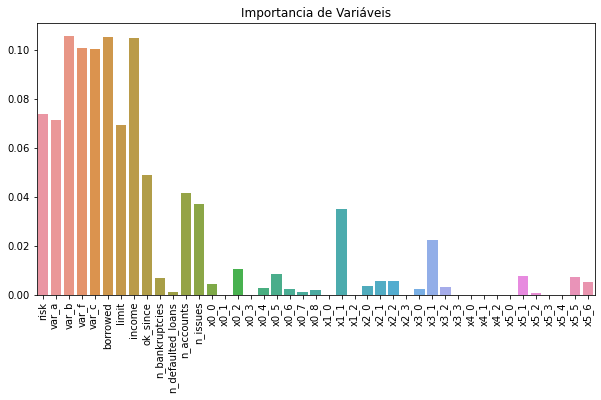

In [17]:
from sklearn.tree import DecisionTreeRegressor

# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_

# plot feature importance
plt.figure(figsize = (10,5))

sns.barplot(x = X.columns, y = importance)

plt.xticks(rotation=90)
plt.title ('Importancia de Variáveis')
plt.show()

In [18]:
for col in X.columns:
    if 'x0' in col:
        X.drop(col, axis=1, inplace=True)
    if 'x4' in col:
        X.drop(col, axis=1, inplace=True)
    if 'x5' in col:
        X.drop(col, axis=1, inplace=True)

In [19]:
X

,risk,var_a,var_b,var_f,var_c,borrowed,limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,x1_0,x1_1,x1_2,x2_0,x2_1,x2_2,x2_3,x3_0,x3_1,x3_2,x3_3
id,,,,,,,,,,,,,,,,,,,,,,,,
77a10088-92d9-62a3-defb-4b63b6f28805,0.30,340.0,9.387215e+11,11.334449,0.777031,4.406948,25336.5,5.000386,3.2,0.0,0.0,8.0,10.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
26a68732-a660-8cf9-340d-34c88ecdcbf0,0.25,470.0,1.035186e+16,11.272492,0.082595,7.207452,34819.0,25.612936,1.6,0.0,0.0,10.0,9.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
fd228aa8-5a67-6561-4382-21c35360c01d,0.17,360.0,1.029325e+11,17.466067,0.980142,5.606776,34558.0,26.014152,1.9,0.0,0.0,20.0,20.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
083ca221-7f4e-21c7-204d-2962c3ca9c14,0.21,280.0,1.028746e+11,18.386232,0.561958,21.489420,0.0,12.415976,3.2,1.0,0.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
a390d111-8c65-6e1f-9566-91d815e9a4a1,0.39,150.0,9.784525e+11,12.578538,0.152126,27.083460,25336.5,6.000551,1.6,0.0,0.0,14.0,10.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f9eb9e71-e8ca-bd7b-f7ad-2b2f2048541c,0.33,440.0,9.908720e+11,17.945112,0.316950,21.692220,25336.5,22.804856,3.2,0.0,0.0,8.0,10.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
687f396b-64bb-33f2-310c-a2548248d7b0,0.20,230.0,9.647300e+11,16.819999,0.596363,29.292030,15478.0,30.413108,2.9,0.0,0.0,13.0,13.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2e359df0-bc13-74c8-f6f9-a40d2b4d0395,0.53,320.0,9.322104e+10,17.046043,0.260647,14.008912,18658.0,5.001423,3.2,0.0,0.0,7.0,7.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


# Classificadores e Métricas
Buscamos um classificador que minimize o risco de não pagamento, logo usamos a métrica de Recall

Arvore de Decisão

Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.83      0.84     12624
           1       0.21      0.24      0.22      2368

    accuracy                           0.74     14992
   macro avg       0.53      0.54      0.53     14992
weighted avg       0.75      0.74      0.75     14992

Accuracy on test data: 0.74
Confusion Matrix


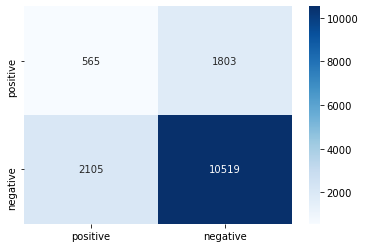


Recall Médio: 0.24121976866456363

Floresta Aleatória

Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.99      0.91     12624
           1       0.51      0.05      0.08      2368

    accuracy                           0.84     14992
   macro avg       0.68      0.52      0.50     14992
weighted avg       0.79      0.84      0.78     14992

Accuracy on test data: 0.84
Confusion Matrix


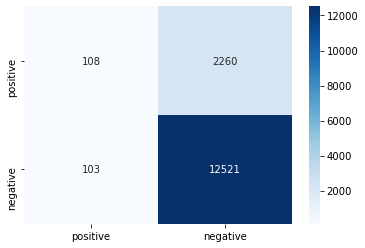


Recall Médio: 0.043217665615141954

Regressão Logistica

Classification Report : 
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     12624
           1       0.00      0.00      0.00      2368

    accuracy                           0.84     14992
   macro avg       0.42      0.50      0.46     14992
weighted avg       0.71      0.84      0.77     14992

Accuracy on test data: 0.84
Confusion Matrix


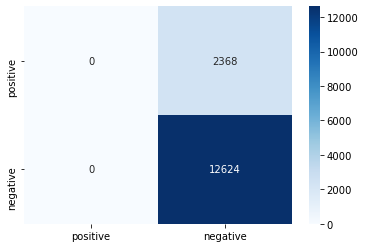


Recall Médio: 0.0

GradientBoosting

Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     12624
           1       0.49      0.03      0.05      2368

    accuracy                           0.84     14992
   macro avg       0.67      0.51      0.48     14992
weighted avg       0.79      0.84      0.78     14992

Accuracy on test data: 0.84
Confusion Matrix


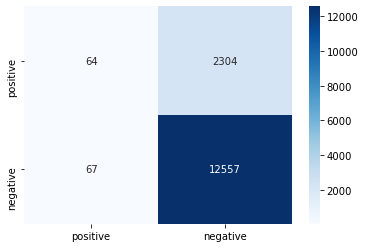


Recall Médio: 0.029652996845425866

Suport Vector Classifier

Classification Report : 
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     12624
           1       0.00      0.00      0.00      2368

    accuracy                           0.84     14992
   macro avg       0.42      0.50      0.46     14992
weighted avg       0.71      0.84      0.77     14992

Accuracy on test data: 0.84
Confusion Matrix


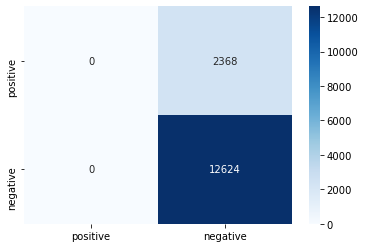


Recall Médio: 0.0

Naives Bayes Classifier

Classification Report : 
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     12624
           1       0.00      0.00      0.00      2368

    accuracy                           0.84     14992
   macro avg       0.42      0.50      0.46     14992
weighted avg       0.71      0.84      0.77     14992

Accuracy on test data: 0.84
Confusion Matrix


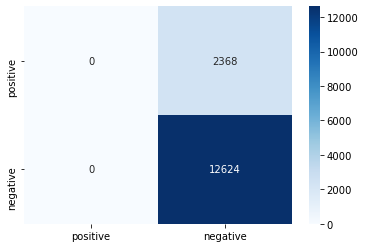


Recall Médio: 0.0



In [389]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, classification_report, roc_curve, make_scorer, roc_auc_score
from numpy import random


import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble  import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y.astype(int), random_state = 0)

random.seed(1)

models = {
            "Arvore de Decisão": DecisionTreeClassifier(random_state = 0),
            "Floresta Aleatória": RandomForestClassifier(random_state = 0),
            "Regressão Logistica": LogisticRegression(solver='liblinear',random_state = 0),
            "GradientBoosting": GradientBoostingClassifier(random_state = 0),
            "Suport Vector Classifier": SVC(random_state = 0),
            "Naives Bayes Classifier": GaussianNB()
}
score_lst = []
scoring = make_scorer(recall_score)

for model_name in models.keys():
    model = models[model_name]
    score = cross_validate(model, X,y.astype(int), cv=5, scoring = scoring)['test_score'].mean()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(model_name+'\n')
    print('Classification Report : ' )
    print(classification_report(y_test, y_pred))
    print("Accuracy on test data: {:.2f}".format(accuracy_score(y_test, y_pred)))
    print('Confusion Matrix')

    cols = ['negative', 'positive']
    plt.figure(figsize=(6,4)),

    mtr = pd.DataFrame(confusion_matrix(y_test, y_pred), index = cols, columns = cols )
    mtr = mtr.loc[['positive', 'negative'], ['positive', 'negative']]
    sns.heatmap(data = mtr, annot = True, fmt='d', cmap="Blues")
    
    
    plt.show()
    print("\nRecall Médio: {}\n".format(score))

# Buscando hiperparametros

In [237]:
from sklearn.model_selection import GridSearchCV

random.seed(1)

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': list(range(20,200,10)),
    'min_samples_leaf': [1, 2, 4, 8],
    'min_samples_split': [2, 4, 8,16]
}
# Create a based model
tree = DecisionTreeClassifier(random_state = 0)

recall = make_scorer(recall_score)
# Instantiate the grid search model
clf = GridSearchCV(estimator = tree, param_grid = param_grid,
                   n_jobs = -1, verbose = 2, scoring = recall)
# Fit the grid search to the data
clf.fit(X_train, y_train)
clf.best_params_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  3.9min finished


{'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2}

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


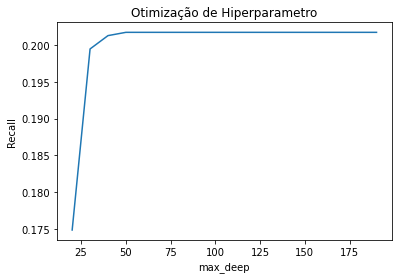

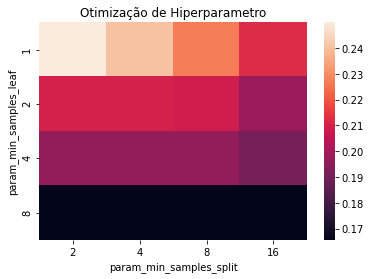

In [240]:
print(clf.cv_results_.keys())
recall = np.array([clf.cv_results_['split{}_test_score'.format(i)] for i in range(5)]).mean(axis=0)
recall = recall.reshape(18,4,4)
recall_max_deep = recall.mean(axis=1).mean(axis=1)
recall_samples = recall.mean(axis=0)
#tpr = pd.DataFrame(tpr, )
sns.lineplot(x = range(20, 200,10), y = recall_max_deep)
plt.title('Otimização de Hiperparametro')

plt.ylabel('Recall')
plt.xlabel('max_deep')
plt.show()
sns.heatmap(pd.DataFrame(recall_samples, index =[1,2,4,8] , columns =[2,4,8,16]))

plt.title('Otimização de Hiperparametro')
plt.ylabel('param_min_samples_leaf')
plt.xlabel('param_min_samples_split')
plt.show()

In [241]:
from sklearn.model_selection import GridSearchCV

random.seed(1)

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': list(range(20,200,10))
}
# Create a based model
tree = DecisionTreeClassifier(random_state = 0)
acc = make_scorer(accuracy_score)
# Instantiate the grid search model
clf = GridSearchCV(estimator = tree, param_grid = param_grid,
                   n_jobs = -1, verbose = 2, scoring = acc )
# Fit the grid search to the data
clf.fit(X_train, y_train)
clf.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   15.7s finished


{'max_depth': 20}

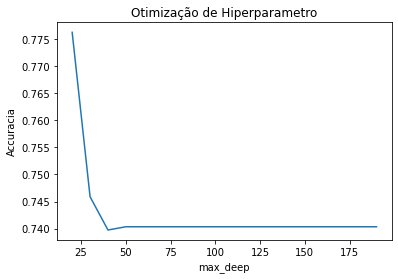

In [243]:
acc = np.array([clf.cv_results_['split{}_test_score'.format(i)] for i in range(5)]).mean(axis=0)
#tpr = tpr.reshape(18,4,4)
#tpr_max_deep = tpr.mean(axis=1).mean(axis=1)
#tpr_min_samples = tpr.mean(axis=0)
#tpr = pd.DataFrame(tpr, )
sns.lineplot(x = range(20, 200,10), y = acc)
plt.title('Otimização de Hiperparametro')

plt.ylabel('Accuracia')
plt.xlabel('max_deep')
plt.show()
#sns.heatmap(pd.DataFrame(tpr_min_samples, index =[1,2,4,8] , columns =[2,4,8,16]))

#plt.title('Otimização de Hiperparametro')
#plt.ylabel('param_min_samples_leaf')
#plt.xlabel('param_min_samples_split')
#plt.show()

# Modelo Otimizado por Recall

Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.83      0.84     12624
           1       0.21      0.24      0.22      2368

    accuracy                           0.74     14992
   macro avg       0.53      0.54      0.53     14992
weighted avg       0.75      0.74      0.75     14992

Accuracy on test data: 0.74
Confusion Matrix


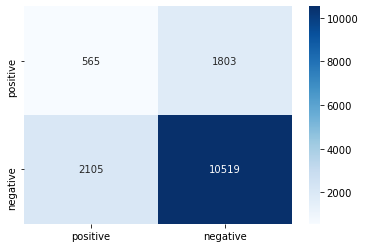

Recall Médio: 0.24111461619348057



In [291]:
random.seed(1)

model = DecisionTreeClassifier(
                             max_depth= 50,
                             min_samples_leaf= 1,
                             min_samples_split= 2,
                             random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

scoring = make_scorer(recall_score)

score = cross_validate(model, X,y.astype(int), cv=5, scoring = scoring)['test_score'].mean()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
    
#print(model_name+'\n')
print('Classification Report : ' )
print(classification_report(y_test, y_pred))
print("Accuracy on test data: {:.2f}".format(accuracy_score(y_test, y_pred)))
print('Confusion Matrix')
    
cols = ['negative', 'positive']
plt.figure(figsize=(6,4)),

mtr = pd.DataFrame(confusion_matrix(y_test, y_pred), index = cols, columns = cols )
mtr = mtr.loc[['positive', 'negative'], ['positive', 'negative']]
sns.heatmap(data = mtr, annot = True, fmt='d', cmap="Blues")
    
plt.show()
print("Recall Médio: {}\n".format(score))

# Modelo Otimizado por Acurácia

Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     12624
           1       0.24      0.18      0.21      2368

    accuracy                           0.78     14992
   macro avg       0.55      0.54      0.54     14992
weighted avg       0.76      0.78      0.77     14992

Accuracy on test data: 0.78
Confusion Matrix


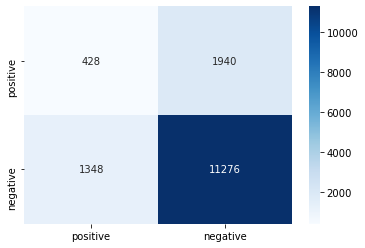


Acurácia Média: 0.7839442748695842



In [292]:
random.seed(1)

model = DecisionTreeClassifier(
                             max_depth= 20,
                             min_samples_leaf= 1,
                             min_samples_split= 2,
                             random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

scoring = make_scorer(accuracy_score)

score = cross_validate(model, X,y.astype(int), cv=5, scoring = scoring)['test_score'].mean()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
    
#print(model_name+'\n')
print('Classification Report : ' )
print(classification_report(y_test, y_pred))
print("Accuracy on test data: {:.2f}".format(accuracy_score(y_test, y_pred)))
print('Confusion Matrix')
    
cols = ['negative', 'positive']
plt.figure(figsize=(6,4)),

mtr = pd.DataFrame(confusion_matrix(y_test, y_pred), index = cols, columns = cols )
mtr = mtr.loc[['positive', 'negative'], ['positive', 'negative']]
sns.heatmap(data = mtr, annot = True, fmt='d', cmap="Blues")

plt.show()
print("\nAcurácia Média: {}\n".format(score))

# Modelo Hibrido

Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.83      0.84     12624
           1       0.21      0.24      0.22      2368

    accuracy                           0.74     14992
   macro avg       0.53      0.54      0.53     14992
weighted avg       0.75      0.74      0.75     14992

Accuracy on test data: 0.74
Recall on test data: 0.24
Confusion Matrix


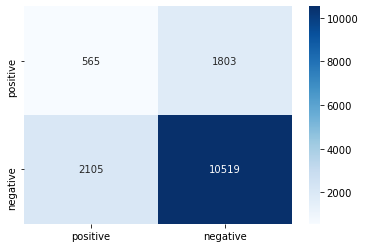

In [265]:
model_acc = DecisionTreeClassifier(
                             max_depth= 20,
                             min_samples_leaf= 1,
                             min_samples_split= 2,
                             random_state = 0)
model_recall = DecisionTreeClassifier(
                             max_depth= 50,
                             min_samples_leaf= 1,
                             min_samples_split= 2,
                             random_state = 0)

model_acc.fit(X_train, y_train)
model_recall.fit(X_train, y_train)

w1, w2  = 0.9, 0.1
y_probs_acc = model_acc.predict_proba(X_test)
y_probs_recall = model_recall.predict_proba(X_test)

y_probs = w1*y_probs_recall + w2*y_probs_acc
y_pred = (y_probs > 0.5).astype(int)[:,1]

#print(model_name+'\n')
print('Classification Report : ' )
print(classification_report(y_test, y_pred))
print("Accuracy on test data: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Recall on test data: {:.2f}".format(recall_score(y_test, y_pred)))
print('Confusion Matrix')
    
cols = ['negative', 'positive']
plt.figure(figsize=(6,4)),

mtr = pd.DataFrame(confusion_matrix(y_test, y_pred), index = cols, columns = cols )
mtr = mtr.loc[['positive', 'negative'], ['positive', 'negative']]
sns.heatmap(data = mtr, annot = True, fmt='d', cmap="Blues")

plt.show()

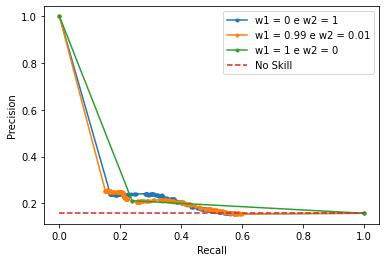

In [390]:
from sklearn.metrics import precision_recall_curve

weights = [(0, 1),(0.99, 0.01), (1, 0)]



y_probs_acc = model_acc.predict_proba(X_test)
y_probs_recall = model_tpr.predict_proba(X_test)

for w1, w2 in weights:
    ns_probs = [0 for _ in range(len(y_test))]
    
    y_probs = w1*y_probs_recall + w2*y_probs_acc
    y_probs = y_probs[:,1]
    #y_pred = (y_test > 0.5).astype(int)
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_probs)
    # plot the precision-recall curves
    no_skill = len(y_test[y_test==1]) / len(y_test)
    plt.plot(lr_recall, lr_precision, marker='.', label='w1 = {} e w2 = {}'.format(w1, w2))
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
# show the plot
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.legend()
plt.show()